In [331]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv('medical_examination.csv')

In [5]:
df.describe

<bound method NDFrame.describe of           id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0   

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [442]:
df['overweight'] = df['weight'] / (df['height'] / 100.0)**2  > 25
df['cholesterol'] = df['cholesterol'] > 1
df['gluc'] = df['gluc'] > 1

In [443]:
df['overweight'] = df['overweight'].astype(int)
df['cholesterol'] = df['cholesterol'].astype(int)
df['gluc'] = df['gluc'].astype(int)

In [417]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [418]:
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [291]:
df_cat_chart = df_cat.groupby(['cardio','variable', 'value']).size()

In [292]:
df_cat_chart.name = "total"

In [225]:
# df_cat = df_cat.groupby(['cardio', 'variable'])

#.unstack(fill_value=0).reset_index()

In [287]:
type(df_cat_chart.to_frame())

pandas.core.frame.DataFrame

In [293]:
df_cat_chart_df = pd.DataFrame(df_cat_chart)

In [294]:
df_cat_chart_df

total
cardio variable    value       
0      active      0       6378
                   1      28643
       alco        0      33080
                   1       1941
       cholesterol 0      29330
                   1       5691
       gluc        0      30894
                   1       4127
       overweight  0      15915
                   1      19106
       smoke       0      31781
                   1       3240
1      active      0       7361
                   1      27618
       alco        0      33156
                   1       1823
       cholesterol 0      23055
                   1      11924
       gluc        0      28585
                   1       6394
       overweight  0      10539
                   1      24440
       smoke       0      32050
                   1       2929

In [215]:
df_cat_chart.unstack(level=0)

AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

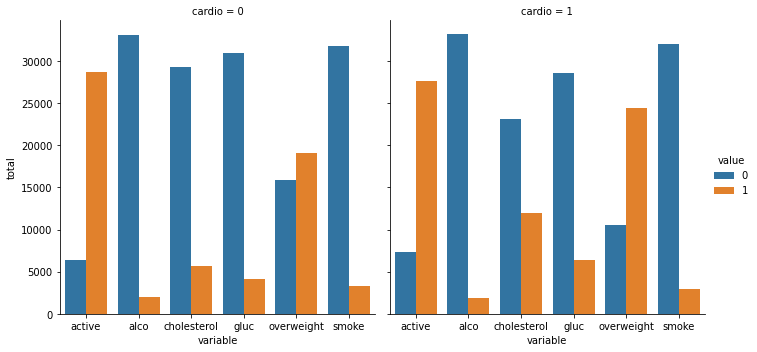

In [295]:
cat_plot = sns.catplot( data=df_cat_chart_df, x='variable', y='total' , col='cardio', hue='value', kind='bar')

In [296]:
cat_plot.fig.savefig('catplot.png')

In [297]:
df_heat = df

In [298]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [439]:
df_heat = df[  (df['ap_lo'] <= df['ap_hi'])
             & (df['height'] >= df['height'].quantile(0.025))
             & (df['height'] <= df['height'].quantile(0.975))
             & (df['weight'] >= df['weight'].quantile(0.025))
             & (df['weight'] <= df['weight'].quantile(0.975))]

In [433]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


In [434]:
corr = df_heat.corr()

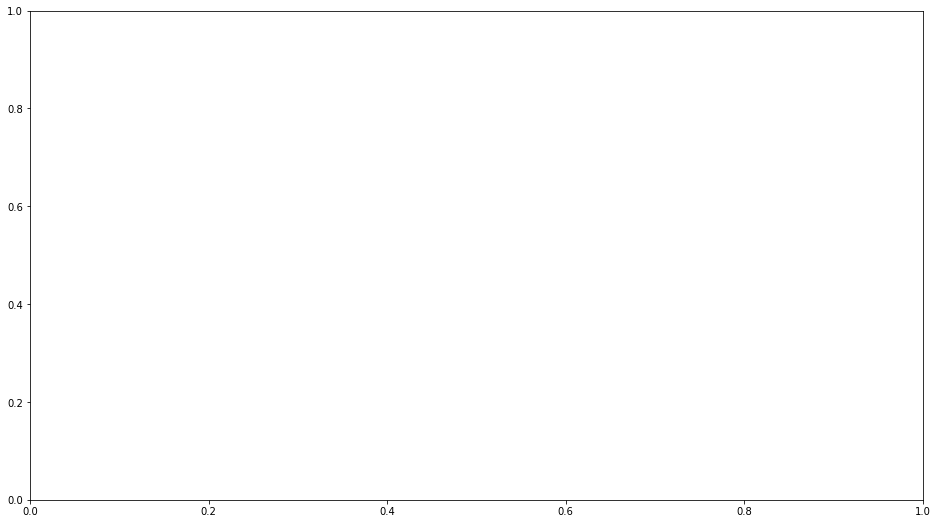

In [435]:
fig, ax = plt.subplots(figsize=(16,9))

In [395]:
ax

<Axes: >

In [398]:
print(ax.spines)

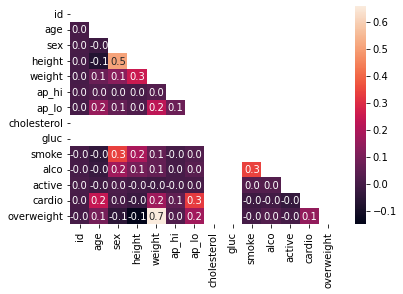

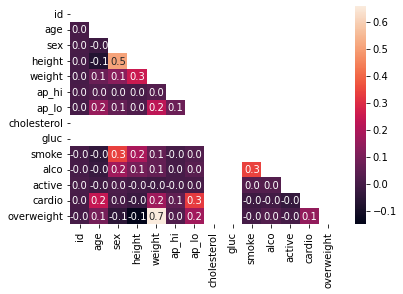

In [440]:
sns.heatmap(corr, mask=np.triu(corr),annot=True, fmt='.1f').figure

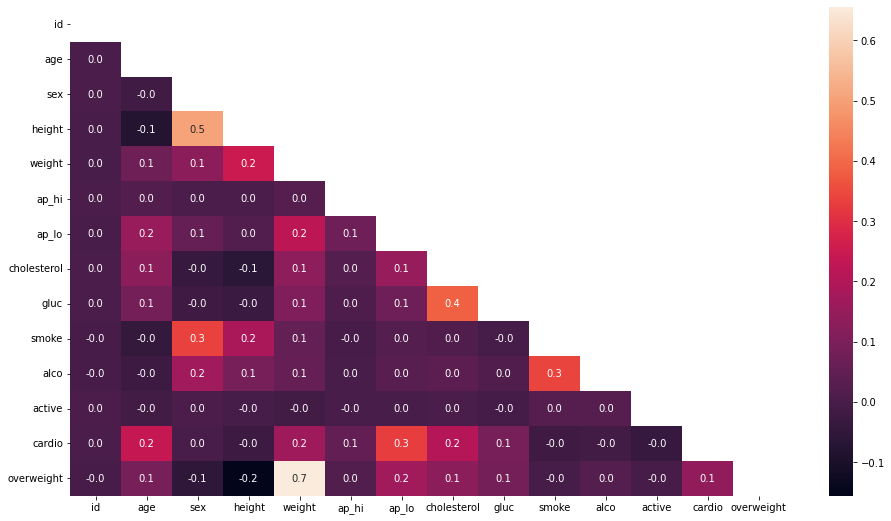

In [404]:
fig